In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV , cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , roc_auc_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTETomek
import warnings
warnings.filterwarnings("ignore")


In [2]:
# loading the dataset to pandas DataFrame
import pandas as pd
from google.colab import files
data_to_load = files.upload()

Saving Telecom_customer_churn.csv to Telecom_customer_churn.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['Telecom_customer_churn.csv'])) 

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
""" TotalCharge is numeric col however it is showing object type"""
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors='coerce')

In [12]:
categorical_col = df.select_dtypes(include = "object")
num_col = df.select_dtypes(exclude = "object")

In [13]:
categorical_col.describe()


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [14]:
# dropped all missing Observations
df.dropna(inplace = True) 

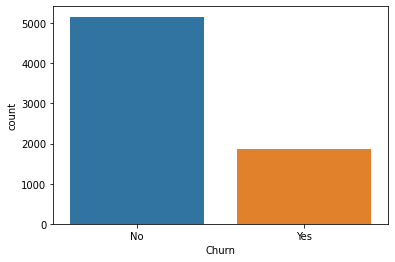

In [15]:
sns.countplot(df["Churn"]);

Too Much difference in Yes and No Observation
Imbalance dataset

In [16]:
# checking the value of each categorical columns
def value_count(j):
    for i in categorical_col.columns:
        print(i,"\n",categorical_col[i].value_counts(),"\n")

In [17]:
value_count(categorical_col)

customerID 
 7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64 

gender 
 Male      3555
Female    3488
Name: gender, dtype: int64 

Partner 
 No     3641
Yes    3402
Name: Partner, dtype: int64 

Dependents 
 No     4933
Yes    2110
Name: Dependents, dtype: int64 

PhoneService 
 Yes    6361
No      682
Name: PhoneService, dtype: int64 

MultipleLines 
 No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

InternetService 
 Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 

OnlineSecurity 
 No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 

OnlineBackup 
 No                     3088
Yes                    2429
No internet service    1526
Name: On

In [23]:
# defining a function to plot distribution plot and box plot to see the distribution and outlier
def check_dis_outlier(j, variable):
    plt.figure(figsize =(10,6))
    plt.subplot(121)
    sns.distplot(j[variable])
    
    plt.subplot(122)
    sns.boxplot(j[variable])


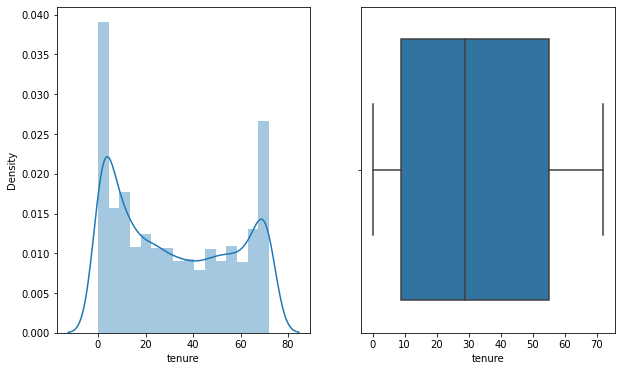

In [24]:
check_dis_outlier(num_col,"tenure")

Skewness in the data

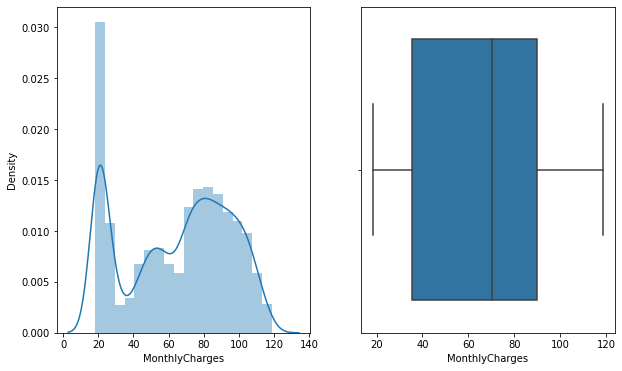

In [25]:
check_dis_outlier(num_col,"MonthlyCharges")

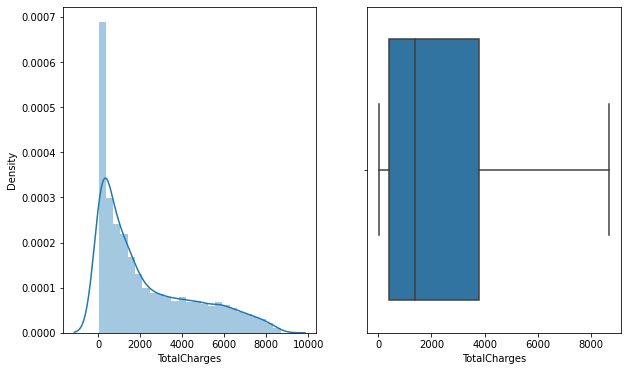

In [26]:
check_dis_outlier(num_col,"TotalCharges")

It has skewed one and  no outlier


In [27]:
# Checking for skewness in the dataset 
num_col.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

In [28]:
df["TotalCharges"] = np.cbrt(df["TotalCharges"])

In [29]:
df["TotalCharges"].skew()

0.012818570057014146

Skewness has been corrected, have applied log and squareroot function transformation but cuberoot worked well thus treated the same with cuberoot



In [30]:
df.groupby(["gender","Churn"])["Churn"].count()

gender  Churn
Female  No       2544
        Yes       939
Male    No       2619
        Yes       930
Name: Churn, dtype: int64

In [31]:
df.groupby(["gender"]).mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
gender,,,,
Female,0.163078,32.290841,65.216652,11.365254
Male,0.161736,32.550296,64.387546,11.345427


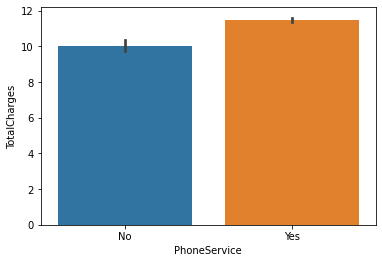

In [33]:
sns.barplot(x="PhoneService", y = "TotalCharges", data = df)


In [34]:
 pd.pivot_table(df, values = "TotalCharges", index = ["PhoneService","MultipleLines"], aggfunc = "mean",columns = "Churn")

Churn                                 No        Yes
PhoneService MultipleLines                         
No           No phone service  11.004291   7.122934
Yes          No                 9.867530   7.429445
             Yes               14.900716  11.941814

In [35]:
pd.pivot_table(df, values = "TotalCharges", index = ["OnlineSecurity","OnlineBackup"], aggfunc = "count",columns = "Churn")

Churn                                      No   Yes
OnlineSecurity      OnlineBackup                   
No                  No                   1138  1057
                    Yes                   898   404
No internet service No internet service  1407   113
Yes                 No                    716   176
                    Yes                  1004   119

In [36]:
#people who are not using services, they are more like to churn as we can see from the above table
pd.pivot_table(df, values = "TotalCharges", index = ["TechSupport"], aggfunc = "count",columns = "Churn")

Churn,No,Yes
TechSupport,,
No,2026,1446
No internet service,1407,113
Yes,1730,310


No tech support

In [37]:
pd.pivot_table(df, values = "TotalCharges", index = ["Contract"], aggfunc = "count",columns = "Churn")


Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1306,166
Two year,1637,48


we have seen high churn rate in month to month cycle. 89% custmer are getting churned out from month to month rental we can say from the over all churn count, may company has to think on the plan benefit revision



In [38]:
pd.pivot_table(df, values = "TotalCharges", index = ["Contract","PaperlessBilling"], aggfunc = "count",columns = "Churn")

Churn                              No   Yes
Contract       PaperlessBilling            
Month-to-month No                 883   406
               Yes               1337  1249
One year       No                 625    48
               Yes                681   118
Two year       No                 887    15
               Yes                750    33

paper-less bill should not be adding any value to churn but we can see the pattern with regard to Yes and high chrun under month to month contract.



In [39]:
pd.pivot_table(df, values = "TotalCharges", index = ["PaymentMethod"], aggfunc = "count",columns = "Churn")

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


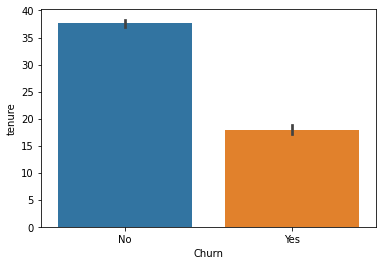

In [40]:
sns.barplot(x = "Churn", y = "tenure", data = df)

People who churn they average tenure is less 20


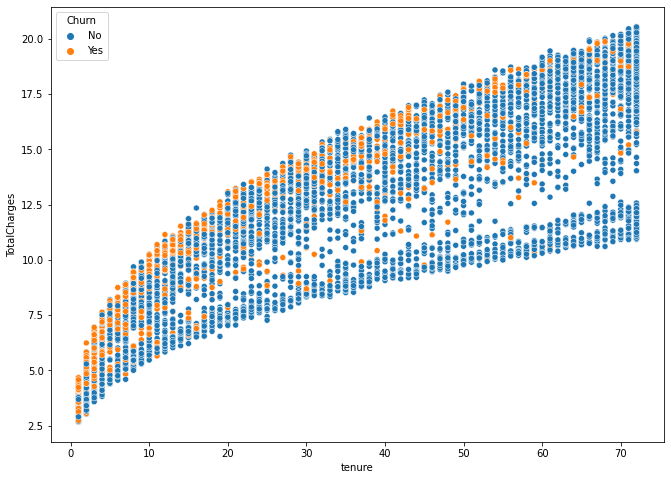

In [41]:
plt.figure(figsize =(11,8))
sns.scatterplot(x ="tenure",y = "TotalCharges", data = df, hue = "Churn")

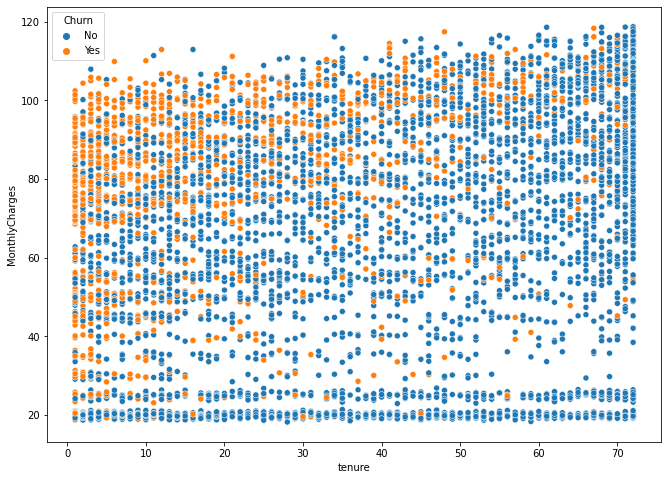

In [42]:
plt.figure(figsize =(11,8))
sns.scatterplot(x ="tenure",y = "MonthlyCharges", data = df, hue = "Churn")

In [43]:
num_col.var()

SeniorCitizen     1.358745e-01
tenure            6.031681e+02
MonthlyCharges    9.054109e+02
TotalCharges      5.138252e+06
dtype: float64

In [44]:
df.drop("customerID",axis =1, inplace = True)

In [45]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["gender"] = le.fit_transform(df["gender"])
df["Partner"] = le.fit_transform(df["Partner"])
df["Dependents"] = le.fit_transform(df["Dependents"])
df["PhoneService"] = le.fit_transform(df["PhoneService"])
df["MultipleLines"] = le.fit_transform(df["MultipleLines"])
df["InternetService"] = le.fit_transform(df["InternetService"])
df["OnlineSecurity"] = le.fit_transform(df["OnlineSecurity"])
df["DeviceProtection"] = le.fit_transform(df["DeviceProtection"])
df["TechSupport"] = le.fit_transform(df["TechSupport"])
df["StreamingTV"] = le.fit_transform(df["StreamingTV"])
df["StreamingMovies"] = le.fit_transform(df["StreamingMovies"])
df["Contract"] = le.fit_transform(df["Contract"])
df["OnlineBackup"] = le.fit_transform(df["OnlineBackup"])
df["PaperlessBilling"] = le.fit_transform(df["PaperlessBilling"])
df["PaymentMethod"] = le.fit_transform(df["PaymentMethod"])
df["Churn"] = le.fit_transform(df["Churn"])


In [46]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

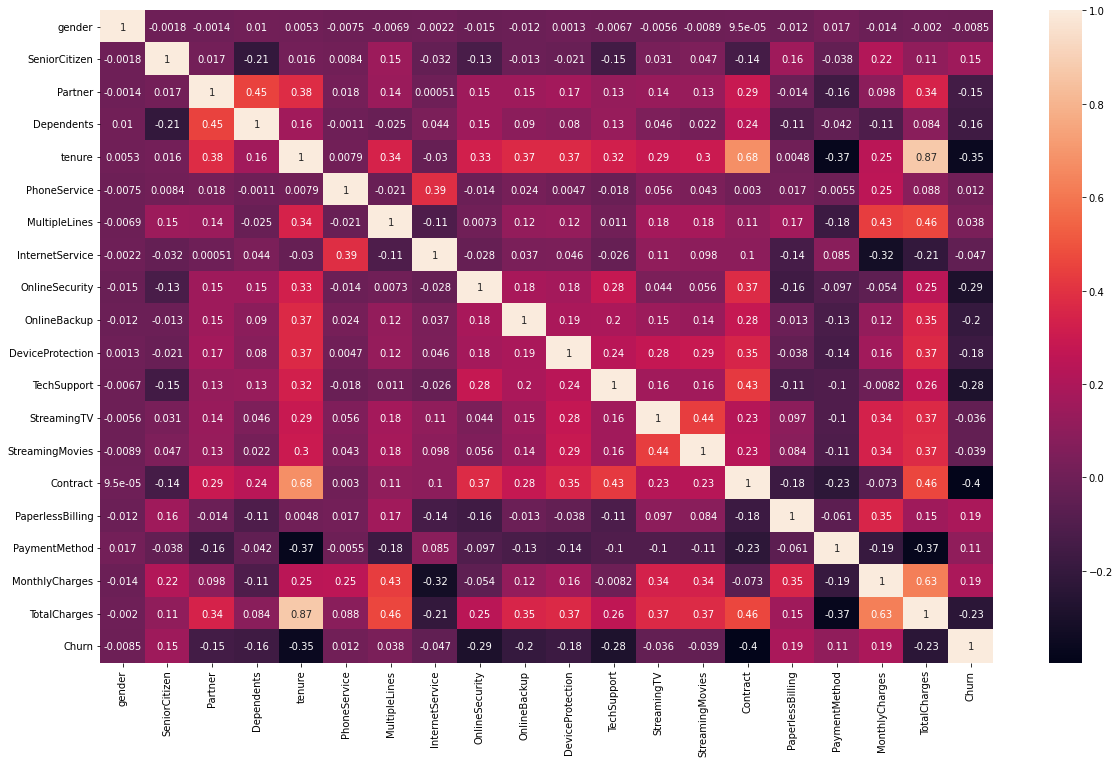

In [47]:
plt.figure(figsize =(20,12))
sns.heatmap(df.corr(),annot = True, annot_kws={'size':10})


**Model** **Building**

In [48]:
X=df.drop("Churn",axis =1)
y=df["Churn"]

In [51]:
from imblearn.over_sampling import SMOTE


In [54]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [56]:
for i in range(50,350,40):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2, random_state =i)
    LR = LogisticRegression()
    LR.fit(X_train,y_train)
    pred = LR.predict(X_test)
    print("Accuracy",accuracy_score(y_test,pred),i)
    print("ROC_AUC_score",roc_auc_score(y_test,pred))
    print("classification_report","\n",classification_report(y_test,pred))
    print("confusion_matrix","\n",confusion_matrix(y_test,pred))


Accuracy 0.7696030977734754 50
ROC_AUC_score 0.7711812821178984
classification_report 
               precision    recall  f1-score   support

           0       0.81      0.72      0.76      1063
           1       0.73      0.83      0.78      1003

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066

confusion_matrix 
 [[762 301]
 [175 828]]
Accuracy 0.8034849951597289 90
ROC_AUC_score 0.8044915572232645
classification_report 
               precision    recall  f1-score   support

           0       0.83      0.77      0.80      1066
           1       0.78      0.84      0.80      1000

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.81      0.80      0.80      2066

confusion_matrix 
 [[824 242]
 [164 836]]
Accuracy 0.8000968054211036 130
ROC_AUC_score 0.8000131470212606
classification_report

In [57]:
model = [RandomForestClassifier(), AdaBoostClassifier(),GradientBoostingClassifier(), DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB()]

for i in model:
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2, random_state = 130)
    i.fit(X_train,y_train)
    pred = i.predict(X_test)
    print("Accuracy",accuracy_score(y_test,pred),i)
    print("ROC_AUC_score",roc_auc_score(y_test,pred))
    print("classification_report","\n",classification_report(y_test,pred))
    print("confusion_matrix","\n",confusion_matrix(y_test,pred))


Accuracy 0.8606001936108422 RandomForestClassifier()
ROC_AUC_score 0.8607523852452859
classification_report 
               precision    recall  f1-score   support

           0       0.85      0.86      0.86       986
           1       0.87      0.86      0.87      1080

    accuracy                           0.86      2066
   macro avg       0.86      0.86      0.86      2066
weighted avg       0.86      0.86      0.86      2066

confusion_matrix 
 [[852 134]
 [154 926]]
Accuracy 0.8204259438528557 AdaBoostClassifier()
ROC_AUC_score 0.8189720907520097
classification_report 
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       986
           1       0.81      0.85      0.83      1080

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066

confusion_matrix 
 [[776 210]
 [161 919]]
Accuracy 0.8252662149080349 GradientBoostingCl

In [58]:
RF = RandomForestClassifier()
parameter = {"n_estimators" :[100,150,250,300],
            "max_depth":[3,4,5,6],
             "max_features" : ["auto", "sqrt", "log2"],
              "criterion" :['gini', "entropy"]
            }

grid_score = GridSearchCV(RF, parameter,cv = 5,scoring = "roc_auc", n_jobs =-1, verbose =2)
grid_score.fit(X_train,y_train)
print(grid_score.best_params_)


Fitting 5 folds for each of 96 candidates, totalling 480 fits
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 250}


In [59]:
best_para_RF = RandomForestClassifier(criterion = "entropy",max_depth = 6,max_features = "auto",n_estimators = 100)

for i in range(2,11):
    cross_score = cross_val_score(best_para_RF, X,y, cv = i, n_jobs=-1)
    print(i,"mean",cross_score.mean(), "and std", cross_score.std()) 


2 mean 0.7909161340306023 and std 0.019271741235715678
3 mean 0.7971140809606818 and std 0.034433344495810383
4 mean 0.8009915229897562 and std 0.02596960272325199
5 mean 0.801475755281521 and std 0.027884462897676984
6 mean 0.8022467557621539 and std 0.03311291576183083
7 mean 0.8058331856926317 and std 0.027490417270194214
8 mean 0.8028337956874967 and std 0.03182140636756726
9 mean 0.8046796656159363 and std 0.03173874950782672
10 mean 0.8061298843587954 and std 0.027922976643107368
